In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
df_train = pd.read_csv('train.csv', sep=";" , encoding="UTF8" )
df_test = pd.read_csv('test.csv', sep="," , encoding="UTF8" )

FileNotFoundError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'Q047']

features_corr = [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'Q047']

In [ ]:
# creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df_train['Q047'] = labelencoder.fit_transform(df_train['Q047'])
df_test['Q047'] = labelencoder.fit_transform(df_test['Q047'])

In [ ]:
df_train[features].isnull().sum()

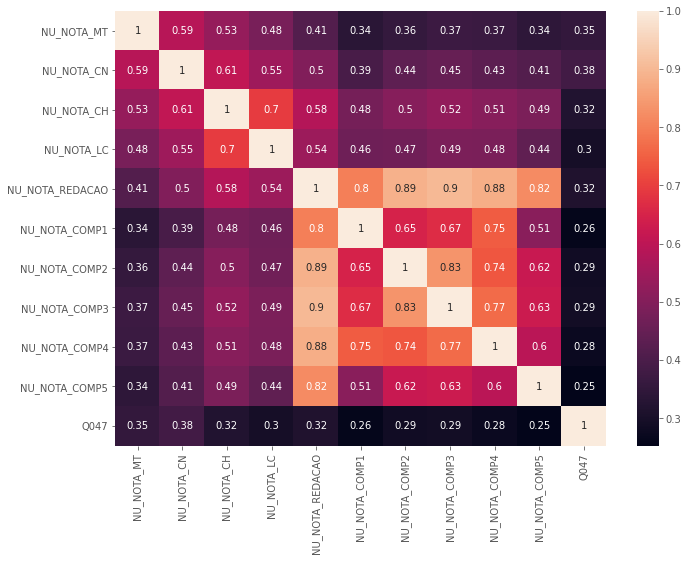

In [ ]:
corr = df_train[features_corr].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

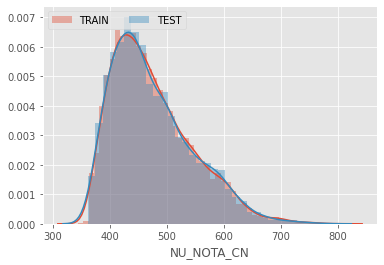

In [ ]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

In [ ]:
# Seleciona somente linhas com valores nesses 4 quesitos a baixo na base de train
df_train = df_train.loc[
      (df_train['NU_NOTA_CN'].notnull())  & (df_train['NU_NOTA_CN'] != 0) & (df_train['NU_NOTA_CH'].notnull())      & (df_train['NU_NOTA_CH'] != 0) 
    & (df_train['NU_NOTA_LC'].notnull())  & (df_train['NU_NOTA_LC'] != 0) & (df_train['NU_NOTA_REDACAO'].notnull()) & (df_train['NU_NOTA_REDACAO'] != 0)    
]

In [ ]:
df_test = df_test.loc[
      (df_test['NU_NOTA_CN'].notnull())  & (df_test['NU_NOTA_CN'] != 0) & (df_test['NU_NOTA_CH'].notnull())      & (df_test['NU_NOTA_CH'] != 0) 
    & (df_test['NU_NOTA_LC'].notnull())  & (df_test['NU_NOTA_LC'] != 0) & (df_test['NU_NOTA_REDACAO'].notnull()) & (df_test['NU_NOTA_REDACAO'] != 0)    
]

In [ ]:
df_test[features].isnull().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
Q047               0
dtype: int64

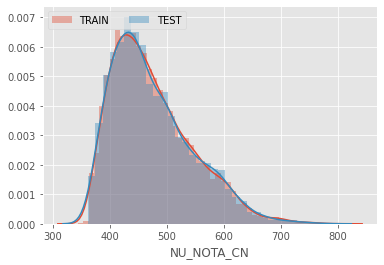

In [ ]:
x0 = df_train['NU_NOTA_CN'].fillna(0)
x1 = df_test['NU_NOTA_CN'].fillna(0)
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST'], ncol=2, loc='upper left');

In [ ]:
df_test['NU_NOTA_COMP1'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP2'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP3'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP4'].fillna(0,inplace=True)
df_test['NU_NOTA_COMP5'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP1'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP2'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP3'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP4'].fillna(0,inplace=True)
df_train['NU_NOTA_COMP5'].fillna(0,inplace=True)

In [ ]:
y_train = df_train['NU_NOTA_MT']
x_train = df_train[features]
x_test = df_test[features]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
regressor = RandomForestRegressor(criterion='mse', warm_start=True)
#regressor = LinearRegression()
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=True)

In [ ]:
 y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 22.42229446
MSE: 813.56497706
RMSE: 28.52306044
